<a href="https://colab.research.google.com/github/rociavl/UNI/blob/main/P5_OP_mejor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[-10.0, -6.0, -4.0, 4.0, 10.0] [10 30 40 60]
1. Emplacement optimal en X et Y: ([40], [10, 20])
    Coût rectangulaire: 4400 € 
      Coût X: 130
      Coût Y: 90
2. El punto más cercano en la recta y=x es: (30, 30)
   Matriz de pendientes:
[[ 1.   0.6  0.4 -0.4 -1. ]
 [ 5.   3.   2.  -2.  -5. ]
 [ 0.   0.   0.   0.   0. ]
 [-1.  -0.6 -0.4  0.4  1. ]]

Moviendo en dirección horario desde X = 30, Y = 30
Nuevo X: 40, Acumulada siguiente en X: -4.0, Acumulada en Y: 10.0
Pendiente calculada: 0.4
Y nueva calculada: 34.0
Punto válido encontrado: X = 40, Y = 34.0

Moviendo en dirección antihorario desde X = 30, Y = 30
Nueva Y: 20, Acumulada actual en Y: 2.0, Acumulada en X: -6.0
X nueva calculada: 26.666666666666668
Punto válido encontrado: X = 26.666666666666668, Y = 20
Resultados del movimiento:
Punto más cercano en recta: X = 30, Y = 30
Movimiento horario: X = 40, Y = 34.0
Movimiento antihorario: X = 26.666666666666668, Y = 20
A partir de aquí decide si es óptimo XD
    Coste punto óptimo:

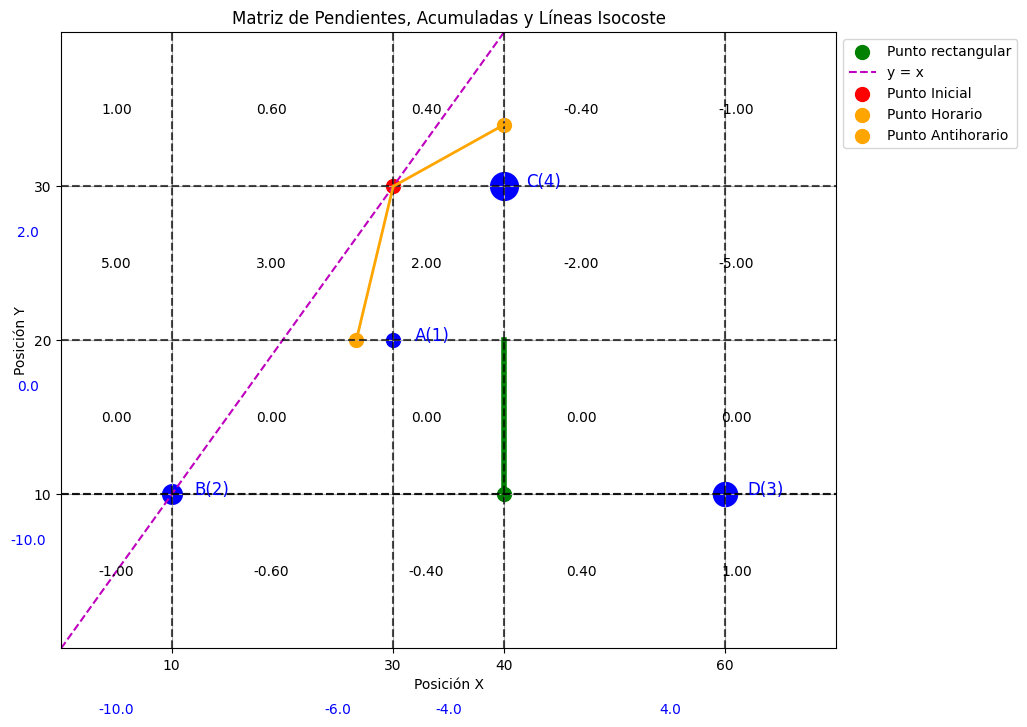

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Données d'entrée
ubi_and_pesos = {
    'A': [30, 20, 1], #---> A_peso
    'B': [10, 10, 2],
    'C': [40, 30, 4], # --> C_peso
    'D': [60, 10, 3]
}
X = 20  # Coût en euros

# Función para calcular el óptimo en una dimensión (X o Y)
def rectangular(ubi_pesos, pesos):
    ubi_pesos = np.array(ubi_pesos)
    pesos = np.array(pesos)

    # Encontrar las ubicaciones únicas y sus índices
    ubi_pesos_uniques, indices = np.unique(ubi_pesos, return_inverse=True)
    pesos_uniques = np.zeros_like(ubi_pesos_uniques, dtype=float)

    # Sumar los pesos correspondientes a cada ubicación única
    for i in range(len(pesos)):
        pesos_uniques[indices[i]] += pesos[i]

    # Calcular la acumulada y los puntos de las ubicaciones
    peso_total = np.sum(pesos_uniques)
    acumulada = [-peso_total]
    ubicaciones_optimas = []

    # Calcular la acumulada para cada ubicación
    for i in range(len(pesos_uniques)):
        acu = acumulada[i] + pesos_uniques[i] * 2
        acumulada.append(acu)

    # Encontrar las ubicaciones óptimas donde cambia el signo de la acumulada
    for j in range(len(acumulada) - 1):
        if acumulada[j] * acumulada[j + 1] < 0:
            ubicaciones_optimas.append(ubi_pesos_uniques[j])
        elif acumulada[j] == 0:
            ubicaciones_optimas.append(ubi_pesos_uniques[j-1])
            ubicaciones_optimas.append(ubi_pesos_uniques[j])

    return ubicaciones_optimas, acumulada, ubi_pesos_uniques

# Función para calcular el óptimo en X e Y
def rectangular_x_y(ubi_and_pesos):
    ubi_pesos_x = []
    ubi_pesos_y = []
    pesos = []

    # Extraer los valores de X, Y y pesos de cada entrada
    for key, value in ubi_and_pesos.items():
        ubi_pesos_x.append(value[0])  # X
        ubi_pesos_y.append(value[1])  # Y
        pesos.append(value[2])  # Peso

    # Calcular las ubicaciones óptimas y acumuladas para X e Y
    ubicacion_optima_x, acumulada_x, eje_x = rectangular(ubi_pesos_x, pesos)
    ubicacion_optima_y, acumulada_y, eje_y = rectangular(ubi_pesos_y, pesos)

    return ubicacion_optima_x, acumulada_x, eje_x, ubicacion_optima_y, acumulada_y, eje_y

# Obtener las posiciones óptimas, acumuladas y los ejes
ubicacion_optima_x, acumulada_x, eje_x, ubicacion_optima_y, acumulada_y, eje_y = rectangular_x_y(ubi_and_pesos)
print(acumulada_x, eje_x)
print(f"1. Emplacement optimal en X et Y: {ubicacion_optima_x, ubicacion_optima_y}")

# Stocker les emplacements optimaux
ubi_optimas = {'rectangular': [ubicacion_optima_x, ubicacion_optima_y]}
# Fonction pour calculer le coût rectangulaire (basé sur la somme des valeurs absolues)
def coste_rectangular(ubi_op, ubi_and_pesos,cost_unitari):
    ubi_pesos_x = np.array([value[0] for value in ubi_and_pesos.values()])  # Coordonnées X
    ubi_pesos_y = np.array([value[1] for value in ubi_and_pesos.values()])  # Coordonnées Y
    pesos = np.array([value[2] for value in ubi_and_pesos.values()])  # Poids
    # Coût pour X basé sur l'approche rectangulaire (valeur absolue)
    coste_x_rect = np.sum(np.abs(ubi_pesos_x - ubi_op['rectangular'][0][0]) * pesos)
    # Coût pour Y
    coste_y_rect = np.sum(np.abs(ubi_pesos_y - ubi_op['rectangular'][1][0]) * pesos)
    # Retourner la somme des coûts X et Y
    return (coste_x_rect + coste_y_rect)*cost_unitari, coste_x_rect ,coste_y_rect

# Calcul des coûts
coste_rect, coste_x_rect ,coste_y_rect = coste_rectangular(ubi_optimas, ubi_and_pesos,X)
# Affichage des résultats
print(f"    \033[1mCoût rectangulaire: {coste_rect} € \033[0m")
print(f"      Coût X: {coste_x_rect}")
print(f"      Coût Y: {coste_y_rect}")


# Función para calcular la distancia euclidiana
def distancia_euclidiana(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Generar puntos cercanos al óptimo para dibujar las líneas isocoste
def generar_isocoste(ubicacion_optima_x, ubicacion_optima_y, intersecciones):
    # Inicializar variables para encontrar el punto más cercano
    distancias_min = np.inf
    punto_optimo = None

    # Si la ubicación óptima X es un rango (lista o array)
    if isinstance(ubicacion_optima_x, (list, np.ndarray)):
        # Obtener los extremos del rango
        puntos_optimos_x = ubicacion_optima_x
    else:
        puntos_optimos_x = [ubicacion_optima_x]  # En caso de un solo punto

    # Evaluar cada punto en el rango de X óptimos
    for x in puntos_optimos_x:
        # Crear el punto a evaluar
        punto_a_evaluar = np.array([x, ubicacion_optima_y])

        # Evaluar cada intersección
        for interseccion in intersecciones:
            distancia = distancia_euclidiana(punto_a_evaluar, interseccion)

            # Actualizar el punto óptimo si encontramos una distancia menor
            if distancia < distancias_min:
                distancias_min = distancia
                punto_optimo = interseccion

    return punto_optimo

# Función para generar las intersecciones con la línea y = x
def generar_intersecciones(ubicaciones):
    intersecciones = []
    for key, value in ubicaciones.items():
        h = value[0]  # X
        v = value[1]  # Y
        # Si la coordenada h o v puede estar en la línea y = x
        if h == v:
            intersecciones.append((h, v))  # Añadir punto (h, h) si h == v
        else:
            # Intersecciones potenciales (h, h) y (v, v)
            intersecciones.append((h, h))
            intersecciones.append((v, v))

    # Eliminar duplicados de intersecciones
    intersecciones = list(set(intersecciones))

    return intersecciones

# Corrigiendo la llamada a la función con el formato correcto
ubicacion_optima_x_punto = ubi_optimas['rectangular'][0]  # Extraer el óptimo en X (puede ser un rango)
ubicacion_optima_y_punto = ubi_optimas['rectangular'][1][0]  # Extraer el óptimo en Y

# Generar las intersecciones posibles con la línea y = x
intersecciones = generar_intersecciones(ubi_and_pesos)

# Llamada a la función generar_isocoste
punto_mas_cercano = generar_isocoste(ubicacion_optima_x_punto, ubicacion_optima_y_punto, intersecciones)

# Mostrar el punto más cercano en la recta y=x
print(f"2. El punto más cercano en la recta y=x es: {punto_mas_cercano}")

# Crear matriz de pendientes entre acumuladas de X y Y
def crear_matriz_pendientes(acumulada_x, acumulada_y):
    matriz_pendientes = np.zeros((len(acumulada_x), len(acumulada_y)))
    for i in range(len(acumulada_x)):
        for j in range(len(acumulada_y)):
            if acumulada_y[j] != 0:
                matriz_pendientes[i, j] = -(acumulada_x[i] / acumulada_y[j])
            else:
                matriz_pendientes[i, j] = 0  # Evitar división por cero
    return matriz_pendientes

# Generar la matriz de pendientes
matriz_pendientes = crear_matriz_pendientes(acumulada_x, acumulada_y)
print("   Matriz de pendientes:")
print(matriz_pendientes.T[::-1])

# Función para encontrar el punto más cercano en la lista de intersecciones,
# ignorando el punto que ya se ha probado (evitar bucles infinitos)
def encontrar_punto_mas_cercano(x_actual, y_actual, intersecciones, ignorar_punto=None):
    distancia_min = float('inf')
    punto_mas_cercano = (x_actual, y_actual)  # Valor por defecto

    # Ordenar intersecciones por la distancia a (x_actual, y_actual)
    intersecciones = sorted(intersecciones, key=lambda p: distancia_euclidiana((x_actual, y_actual), p))

    # Iterar sobre las intersecciones para encontrar el punto más cercano
    for punto in intersecciones:
        x_inter, y_inter = punto
        print(f"Iterando sobre punto de intersección: X = {x_inter}, Y = {y_inter}")  # Debug para mostrar los puntos

        if ignorar_punto and (x_inter, y_inter) == ignorar_punto:
            print(f"Ignorando el punto: X = {x_inter}, Y = {y_inter}")
            continue  # Ignorar el punto que ya ha sido probado

        # Verificar que x >= y para mantener la restricción
        if x_inter >= y_inter:
            print(f"Seleccionando el punto más cercano: X = {x_inter}, Y = {y_inter}")
            punto_mas_cercano = (x_inter, y_inter)
            break  # Seleccionar el primer punto válido

    return punto_mas_cercano

def mover(x_actual, y_actual, eje_x, eje_y, acumulada_x, acumulada_y, matriz_pendientes, intersecciones, punto_mas_cercano):
    """
    Función que mueve en ambas direcciones (horario y antihorario) y ajusta el punto si es necesario.
    Devuelve los resultados del movimiento en ambas direcciones.
    """

    def mover_horario(x_actual, y_actual, eje_x, eje_y, acumulada_x, acumulada_y):
        """
        Mueve en dirección horario y devuelve las nuevas coordenadas.
        """
        print(f"\nMoviendo en dirección horario desde X = {x_actual}, Y = {y_actual}")

        # Buscar el índice del valor más cercano que sea menor o igual que x_actual
        idx_x_actual = np.searchsorted(eje_x, x_actual, side='right') - 1
        if idx_x_actual < 0:  # Si está fuera de rango, usar el primer índice
            idx_x_actual = 0
        elif idx_x_actual >= len(eje_x):  # Si está fuera de rango, usar el último índice
            idx_x_actual = len(eje_x) - 1

        # Buscar el índice del valor más cercano que sea menor o igual que y_actual
        idx_y_actual = np.searchsorted(eje_y, y_actual, side='right') - 1
        if idx_y_actual < 0:
            idx_y_actual = 0
        elif idx_y_actual >= len(eje_y):
            idx_y_actual = len(eje_y) - 1

        # Movimiento horario: buscamos el siguiente punto en el eje X hacia la derecha
        if idx_x_actual < len(eje_x) - 1:
            x_nueva = eje_x[idx_x_actual + 1]  # El siguiente punto en el eje X
            acumulada_x_siguiente = acumulada_x[idx_x_actual+1]  # Acumulada en el siguiente punto

            print(f"Nuevo X: {x_nueva}, Acumulada siguiente en X: {acumulada_x_siguiente}, Acumulada en Y: {acumulada_y[idx_y_actual + 1]}")

            if acumulada_x_siguiente == 0:
                y_nueva = y_actual  # No hay cambio en Y
                print("Acumulada en el siguiente punto es 0, no hay cambio en Y.")
            else:
                pendiente = -(acumulada_x_siguiente / acumulada_y[idx_y_actual + 1])  # Pendiente de la posición anterior
                print(f"Pendiente calculada: {pendiente}")
                # Actualizamos Y usando la fórmula
                y_nueva = pendiente * (x_nueva - x_actual) + y_actual
                print(f"Y nueva calculada: {y_nueva}")

            print(f"Punto válido encontrado: X = {x_nueva}, Y = {y_nueva}")
            return x_nueva, y_nueva

        return x_actual, y_actual  # No hay movimiento posible

    def mover_antihorario(x_actual, y_actual, eje_x, eje_y, acumulada_x, acumulada_y):
        """
        Mueve en dirección antihorario y devuelve las nuevas coordenadas.
        """
        print(f"\nMoviendo en dirección antihorario desde X = {x_actual}, Y = {y_actual}")

        idx_y_actual = np.searchsorted(eje_y, y_actual, side='left') - 1
        if idx_y_actual < 0:
            idx_y_actual = 0
        elif idx_y_actual >= len(eje_y):
            idx_y_actual = len(eje_y) - 1

        # Movimiento antihorario: buscamos el punto anterior en el eje Y hacia la izquierda
        if idx_y_actual > 0:
            y_nueva = eje_y[idx_y_actual]  # El punto anterior en el eje Y
            acumulada_y_actual = acumulada_y[idx_y_actual+1]
            acumulada_x_actual = acumulada_x[idx_y_actual]

            print(f"Nueva Y: {y_nueva}, Acumulada actual en Y: {acumulada_y_actual}, Acumulada en X: {acumulada_x_actual}")

            if acumulada_y_actual == 0:
                x_nueva = x_actual  # No hay cambio en X
                print("Acumulada en el siguiente punto en Y es 0, no hay cambio en X.")
            else:
                pendiente = -acumulada_x_actual / acumulada_y_actual
                x_nueva = (y_nueva - y_actual) / pendiente + x_actual
                print(f"X nueva calculada: {x_nueva}")

            # Verificar si el nuevo punto es válido
            if x_nueva > np.max(eje_x) or x_nueva < np.min(eje_x) or x_nueva < y_nueva:
                print(f"Punto inválido: X = {x_nueva}, Y = {y_nueva}")
                return None, None  # Indica que el punto es inválido
            else:
                print(f"Punto válido encontrado: X = {x_nueva}, Y = {y_nueva}")
                return x_nueva, y_nueva

        print("No hay más puntos hacia la izquierda para el movimiento antihorario.")
        y_nueva_mal = eje_y[0]
        x_nueva_mal = eje_x[0]
        return x_nueva_mal, y_nueva_mal  # No hay movimiento posible

    # Intentar mover en ambas direcciones
    x_nueva, y_nueva = mover_horario(x_actual, y_actual, eje_x, eje_y, acumulada_x, acumulada_y)
    x_nueva_anti, y_nueva_anti = mover_antihorario(x_actual, y_actual, eje_x, eje_y, acumulada_x, acumulada_y)

    # Si el movimiento no fue válido en ambas direcciones, buscar el punto más cercano
    if (x_nueva is None or y_nueva is None) or (x_nueva_anti is None or y_nueva_anti is None):
        print("Movimiento inválido en ambas direcciones: se buscará un nuevo punto.")
        punto_mas_cercano_nuevo = encontrar_punto_mas_cercano(x_actual, y_actual, intersecciones, ignorar_punto=punto_mas_cercano)
        punto_mas_cercano = punto_mas_cercano_nuevo
        # Actualizar x_actual e y_actual con el nuevo punto más cercano
        x_actual, y_actual = punto_mas_cercano_nuevo
        print(f"Nuevo punto más cercano encontrado: X = {x_actual}, Y = {y_actual}")

        # Intentar nuevamente el movimiento en ambas direcciones
        x_nueva, y_nueva = mover_horario(x_actual, y_actual, eje_x, eje_y, acumulada_x, acumulada_y)
        x_nueva_anti, y_nueva_anti = mover_antihorario(x_actual, y_actual, eje_x, eje_y, acumulada_x, acumulada_y)

    # Retornar los nuevos puntos
    return (punto_mas_cercano, x_nueva if x_nueva is not None else x_actual,
            y_nueva if y_nueva is not None else y_actual,
            x_nueva_anti if x_nueva_anti is not None else x_actual,
            y_nueva_anti if y_nueva_anti is not None else y_actual,
)

# Ejemplo de uso
punto_mas_cercano, x_nueva, y_nueva, x_nueva_anti, y_nueva_anti = mover(
    punto_mas_cercano[0],
    punto_mas_cercano[1],
    eje_x,
    eje_y,
    acumulada_x,
    acumulada_y,
    matriz_pendientes,
    intersecciones,
    punto_mas_cercano
)

print(f"Resultados del movimiento:")
print(f"Punto más cercano en recta: X = {punto_mas_cercano[0]}, Y = {punto_mas_cercano[1]}")
print(f"Movimiento horario: X = {x_nueva}, Y = {y_nueva}")
print(f"Movimiento antihorario: X = {x_nueva_anti}, Y = {y_nueva_anti}")
print(f'A partir de aquí decide si es óptimo XD')

ubi_opti_recta = {'rectangular': [[punto_mas_cercano[0]], [punto_mas_cercano[1]]]}

coste_opti = coste_rectangular( ubi_opti_recta, ubi_and_pesos,X)
print(f'    Coste punto óptimo: {coste_opti[0]} euritos')
ahorro = (coste_opti[0] - coste_rect)*230
print(f'    Ahorro: {ahorro} pavets')
years = 4
interest_rate = 0.1
def inversion(ahorro, years, interest_rate):
  inv = 0
  for year in range(1,years+1):
    inv+= ahorro/(1+interest_rate)**year
  return inv

print(f'    \033[1mInversion: {inversion(ahorro, years, interest_rate)} euritos\033[0m')

# Graficar los puntos y las conexiones
def graficar_pendientes_isocoste(matriz_pendientes, acumulada_x, acumulada_y, ubicacion_optima_x, ubicacion_optima_y, eje_x, eje_y, punto_inicial, punto_horario, punto_antihorario):
    fig, ax = plt.subplots(figsize=(10, 8))

    # Encontrar los máximos valores de X e Y para los límites de los ejes
    X_max = max(eje_x) + 10  # Añadimos un margen extra para mejor visualización
    Y_max = max(eje_y) + 10

    # Crear el gráfico de cuadrícula (sin color)
    ax.set_xticks(eje_x)  # Establecer las marcas en el eje X
    ax.set_yticks(eje_y)  # Establecer las marcas en el eje Y

    # Mostrar los valores acumulados y los puntos del eje en X e Y
    for i, acu in enumerate(acumulada_x):
        if i < len(eje_x):  # Asegurarnos de no exceder los índices
            # Ajuste en la posición X para centrar la acumulada
            ax.text(eje_x[i] - 5, -4, f"{acu:.1f}", ha='center', va='center', color='blue')  # Desplazamos a la izquierda
    for j, acu in enumerate(acumulada_y):
        if j < len(eje_y):
            # Ajuste en la posición Y para centrar la acumulada
            ax.text(-3, eje_y[j] - 3, f"{acu:.1f}", ha='center', va='center', color='blue')  # Desplazamos hacia arriba

    # Mostrar las pendientes dentro de cada celda (como texto)
    for i in range(matriz_pendientes.shape[0]):
        for j in range(matriz_pendientes.shape[1]):
            ax.text(i * (X_max / matriz_pendientes.shape[0]) + 5, j * (Y_max / matriz_pendientes.shape[1]) + 5,
                    f"{matriz_pendientes[i, j]:.2f}", ha='center', va='center', color='black')

    # Graficar el rango de puntos óptimos en X con un único valor de Y
    if len(ubicacion_optima_x) > 1:  # Si hay un rango de valores óptimos en X
        plt.plot(ubicacion_optima_x, [ubicacion_optima_y[0]] * len(ubicacion_optima_x), c='green', linewidth=4)
    else:
        plt.scatter(ubicacion_optima_x[0], ubicacion_optima_y[0], c='green', s=100, label = 'Punto rectangular')

    # Graficar el rango de puntos óptimos en Y si hay más de un valor
    if len(ubicacion_optima_y) > 1:  # Si hay un rango de valores óptimos en Y
        plt.plot([ubicacion_optima_x[0]] * len(ubicacion_optima_y), ubicacion_optima_y, c='green', linewidth=4)
    else:
        plt.scatter(ubicacion_optima_x[0], ubicacion_optima_y[0], c='green', s=100)
    # Graficar la línea y = x simple
    x_line = np.linspace(0, min(X_max, Y_max), 100)  # Crear la línea para valores desde 0 hasta el mínimo de X_max e Y_max
    plt.plot(x_line, x_line, 'm--', label='y = x')   # La línea y = x

    # Añadir las líneas que pasan por los puntos (verticales y horizontales)
    for key, value in ubi_and_pesos.items():
        x, y, peso = value
        ax.axvline(x=x, linestyle='--', color='black', alpha=0.7)  # Línea vertical en x
        ax.axhline(y=y, linestyle='--', color='black', alpha=0.7)  # Línea horizontal en y

    # Graficar los puntos inicial y nuevos
    ax.scatter(punto_inicial[0], punto_inicial[1], c='red', s=100, label='Punto Inicial')
    ax.scatter(punto_horario[0], punto_horario[1], c='orange', s=100, label='Punto Horario')
    ax.scatter(punto_antihorario[0], punto_antihorario[1], c='orange', s=100, label='Punto Antihorario')

    # Dibujar líneas hacia los nuevos puntos
    ax.plot([punto_inicial[0], punto_horario[0]], [punto_inicial[1], punto_horario[1]], 'orange', linestyle='-', linewidth=2)
    ax.plot([punto_inicial[0], punto_antihorario[0]], [punto_inicial[1], punto_antihorario[1]], 'orange', linestyle='-', linewidth=2)

    # Añadir título y etiquetas
    plt.title('Matriz de Pendientes, Acumuladas y Líneas Isocoste')
    plt.xlabel('Posición X')
    plt.ylabel('Posición Y')

    # Configurar la leyenda fuera de la gráfica
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.grid(True)
    plt.xlim(0, X_max)
    plt.ylim(0, Y_max)

    # Graficar las ubicaciones de los puntos con sus pesos
    for key, value in ubi_and_pesos.items():
        x, y, peso = value
        ax.scatter(x, y, s=peso * 100, label=f'{key}({peso})', color='blue')  # Tamaño proporcional al peso
        ax.text(x + 2, y, f'{key}({peso})', fontsize=12, color='blue')  # Texto al lado del punto

    plt.show()

# Ejemplo de datos para probar la función
# Matriz de pendientes (usamos la función crear_matriz_pendientes previamente definida)
matriz_pendientes = crear_matriz_pendientes(acumulada_x, acumulada_y)

# Calcular X_max e Y_max basados en los ejes de ubicaciones
X_max = max(eje_x) + 10
Y_max = max(eje_y) + 10

# Graficar con los ajustes corregidos
graficar_pendientes_isocoste(matriz_pendientes, acumulada_x, acumulada_y, ubicacion_optima_x, ubicacion_optima_y, eje_x, eje_y, (punto_mas_cercano[0], punto_mas_cercano[1]), (x_nueva, y_nueva), (x_nueva_anti, y_nueva_anti))